<a href="https://colab.research.google.com/github/mashyko/fast-style-transfer/blob/master/fast_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Code for style transfer proposed in Gatys' A Neural Algorithm of Artistic Style, 



See https://github.com/jcjohnson/fast-neural-style, and 
https://github.com/mashyko/fast-style-transfer for more information.

Please upload the Github repo: https://github.com/mashyko/fast-style-transfer in Google Drive. Then, run this notebook.

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [0]:
%cd fast-style-transfer

/content/drive/My Drive/fast-style-transfer


In [0]:
!pip install tensorflow==1.15

It is neccessary to downgrade scipy == 1.1.0 .

the coding  in evaluate.py and transform.py is modified so as to run for Tensorflow 2.0 but not for Tensorflow 1.x.

In [0]:
!pip install scipy==1.1.0


In [0]:
!python evaluate.py --checkpoint ./ckpt/wave.ckpt  --in-path ./examples/content/enoshima_1.jpg --out-path ./examples/results/enoshima_wave_1.jpg

2020-04-03 13:06:32.974837: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-04-03 13:06:32.979876: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000129999 Hz
2020-04-03 13:06:32.980123: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x19bd480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-04-03 13:06:32.980156: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-04-03 13:06:32.982181: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-03 13:06:33.126419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-03 13:06:33.12713

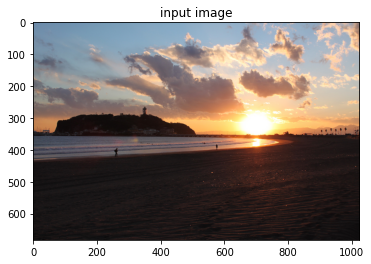

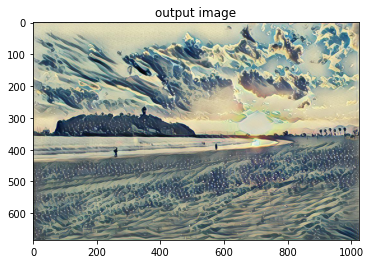

In [0]:
%matplotlib inline
#from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

in_img=mpimg.imread('examples/content/enoshima_1.jpg')
out_img=mpimg.imread('examples/results/enoshima_wave_1.jpg') #image to array


plt.figure()
plt.imshow(in_img)
plt.title('input image')


plt.figure()
plt.imshow(out_img) #array to 2Dfigure
plt.title('output image')

plt.show()

In [0]:
#!wget http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat


In [0]:
!python style.py --style examples/style/picasso_1.jpg \
    --checkpoint-dir ckpt \
    --train-path train/ \
    --test examples/content/enoshima_1.jpg \
    --test-dir examples/content \
    --content-weight 1.5e1 \
    --checkpoint-iterations 1000 \
    --batch-size 20 \
    --vgg-path data/imagenet-vgg-verydeep-19.mat

Train set has been trimmed slightly..
(1, 440, 220, 3)

2020-04-03 13:09:48.411457: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-03 13:09:48.447790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-03 13:09:48.448396: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-04-03 13:09:48.448680: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-04-03 13:09:48.449916: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-04-03 13:09:48.450969: I tensorflow/stream_executor/platform/default/dso_loader.cc:44

In [0]:
!ls ckpt/


checkpoint		      fns.ckpt.meta	  scream.ckpt  wreck.ckpt
fns.ckpt.data-00000-of-00001  la_muse.ckpt	  udnie.ckpt
fns.ckpt.index		      rain_princess.ckpt  wave.ckpt


In [0]:
!python evaluate.py --checkpoint ckpt  --in-path ./examples/content/enoshima_1.jpg --out-path ./examples/results/enoshima_fns.jpg

2020-04-03 13:10:51.486890: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2020-04-03 13:10:51.491415: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000129999 Hz
2020-04-03 13:10:51.491660: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2c3f480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-04-03 13:10:51.491691: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-04-03 13:10:51.493499: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-03 13:10:51.641993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-03 13:10:51.64270

In [0]:
!ls examples/results/

chicago_la_muse.jpg	   chicago_wreck.jpg	fox_udnie.gif
chicago_rain_princess.jpg  enoshima_fns.jpg	stata_udnie_header.jpg
chicago_the_scream.jpg	   enoshima_scream.jpg	stata_udnie.jpg
chicago_udnie.jpg	   enoshima_wave_1.jpg
chicago_wave.jpg	   enoshima_wave.jpg


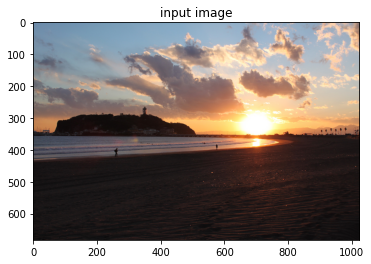

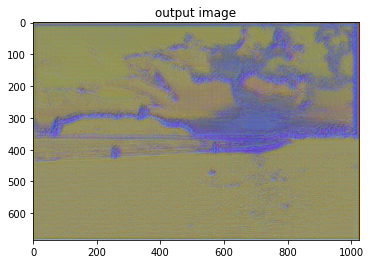

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

in_img=mpimg.imread('examples/content/enoshima_1.jpg')
out_img=mpimg.imread('examples/results/enoshima_fns.jpg') #image to array


plt.figure()
plt.imshow(in_img)
plt.title('input image')


plt.figure()
plt.imshow(out_img) #array to 2Dfigure
plt.title('output image')

plt.show()